In [22]:
!pip install face_recognition opencv-python

Lets try it with this man, never seen ever in my life !

In [23]:
!wget "https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5babb7f1a7ea4342a948b79a%2F0x0.jpg%3Fbackground%3D000000%26cropX1%3D748%26cropX2%3D3075%26cropY1%3D1753%26cropY2%3D4082" -O buffet.jpg

--2021-05-13 02:02:53--  https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5babb7f1a7ea4342a948b79a%2F0x0.jpg%3Fbackground%3D000000%26cropX1%3D748%26cropX2%3D3075%26cropY1%3D1753%26cropY2%3D4082
Resolving thumbor.forbes.com (thumbor.forbes.com)... 151.101.202.49
Connecting to thumbor.forbes.com (thumbor.forbes.com)|151.101.202.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24240 (24K) [image/jpeg]
Saving to: ‘buffet.jpg’

buffet.jpg          100%[===================>]  23.67K  --.-KB/s    in 0.01s   

2021-05-13 02:02:53 (1.59 MB/s) - ‘buffet.jpg’ saved [24240/24240]



![](./buffet.jpg)

In [24]:
import face_recognition

known_face = face_recognition.load_image_file("./buffet.jpg")

In [25]:
!wget -O "buffet_and_others.jpg" "https://ca-times.brightspotcdn.com/dims4/default/cc548c4/2147483647/strip/true/crop/2048x1152+0+0/resize/840x473!/quality/90/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2F36%2F20%2F125a558d4dc05601364d36ae0ec0%2Fla-1561994067-1as37sfpfy-snap-image"

--2021-05-13 02:02:54--  https://ca-times.brightspotcdn.com/dims4/default/cc548c4/2147483647/strip/true/crop/2048x1152+0+0/resize/840x473!/quality/90/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2F36%2F20%2F125a558d4dc05601364d36ae0ec0%2Fla-1561994067-1as37sfpfy-snap-image
Resolving ca-times.brightspotcdn.com (ca-times.brightspotcdn.com)... 54.230.139.68, 54.230.139.118, 54.230.139.10, ...
Connecting to ca-times.brightspotcdn.com (ca-times.brightspotcdn.com)|54.230.139.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48840 (48K) [image/jpeg]
Saving to: ‘buffet_and_others.jpg’

buffet_and_others.j 100%[===================>]  47.70K  --.-KB/s    in 0.1s    

2021-05-13 02:02:54 (453 KB/s) - ‘buffet_and_others.jpg’ saved [48840/48840]



In [26]:
unknown_image = face_recognition.load_image_file("buffet_and_others.jpg")

In [27]:
buffet_encoding = face_recognition.face_encodings(known_face)[0]
unknown_faces = face_recognition.face_encodings(unknown_image)

In [28]:
matches = face_recognition.compare_faces(unknown_faces, buffet_encoding)
matches

[False, False, False, False, True, False]

Its amazing that face_recognition library has already given you the results
It recognised 6 face in the image and knows which one is buffet.

In [29]:
face_locations = face_recognition.face_locations(unknown_image)

In [30]:
face_locations

[(126, 713, 216, 623),
 (115, 591, 177, 529),
 (129, 778, 191, 716),
 (105, 502, 179, 428),
 (56, 384, 146, 295),
 (116, 175, 206, 86)]

In [31]:
buffet_face_location = face_locations[4]

Here all we are trying to do is to make a rectangle around the face based on `buffet_face_location`

In [36]:
import cv2

unknown_image_cv2 = cv2.imread("buffet_and_others.jpg")

In [37]:
(top, right, bottom, left) = buffet_face_location

cv2.rectangle(unknown_image_cv2, (left, top), (right, bottom), (0,255,0),2)

array([[[168, 125,   0],
        [179, 137,   0],
        [190, 150,   8],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[168, 125,   0],
        [179, 137,   0],
        [190, 150,   8],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[168, 125,   0],
        [180, 138,   1],
        [191, 151,   9],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[  2,   0,   0],
        [  5,   3,   2],
        [  6,   4,   4],
        ...,
        [  1,   4,   2],
        [  0,   3,   1],
        [  0,   3,   1]],

       [[  2,   0,   0],
        [  5,   3,   2],
        [  6,   4,   4],
        ...,
        [  1,   4,   2],
        [  0,   3,   1],
        [  0,   3,   1]],

       [[  2,   3,   1],
        [  2,   3,   1],
        [  0,   0,   0],
        ...,
        [  0,   3,   1],
        [  0,   2,   0],
        [  0,   2,   0]]

In [38]:
cv2.rectangle(unknown_image_cv2, (left, bottom+35),(right, bottom), (0,0,255),cv2.FILLED)
font = cv2.FONT_HERSHEY_DUPLEX
cv2.putText(unknown_image_cv2, "Buffet", (left+6, bottom+35), font, 1.0, (255,255,255), 1)

array([[[168, 125,   0],
        [179, 137,   0],
        [190, 150,   8],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[168, 125,   0],
        [179, 137,   0],
        [190, 150,   8],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[168, 125,   0],
        [180, 138,   1],
        [191, 151,   9],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[  2,   0,   0],
        [  5,   3,   2],
        [  6,   4,   4],
        ...,
        [  1,   4,   2],
        [  0,   3,   1],
        [  0,   3,   1]],

       [[  2,   0,   0],
        [  5,   3,   2],
        [  6,   4,   4],
        ...,
        [  1,   4,   2],
        [  0,   3,   1],
        [  0,   3,   1]],

       [[  2,   3,   1],
        [  2,   3,   1],
        [  0,   0,   0],
        ...,
        [  0,   3,   1],
        [  0,   2,   0],
        [  0,   2,   0]]

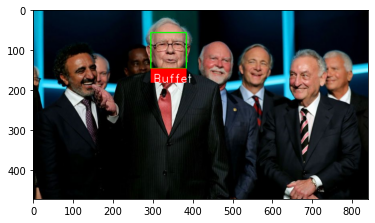

In [39]:
import matplotlib.pyplot as plt
# load image using cv2....and do processing.
plt.imshow(cv2.cvtColor(unknown_image_cv2, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

cool.